# <b>Bag of n_grams: Exercise</b>

* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than Real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

<b>About Data: Fake News Detection<b/>

* Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* This data consists of two columns. - Text - label

* Text is the statements or messages regarding a particular event/situation.

* label feature tells whether the given Text is Fake or Real.

* As there are only 2 classes, this problem comes under the Binary Classification.

In [2]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df

df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
#check the distribution of labels 
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

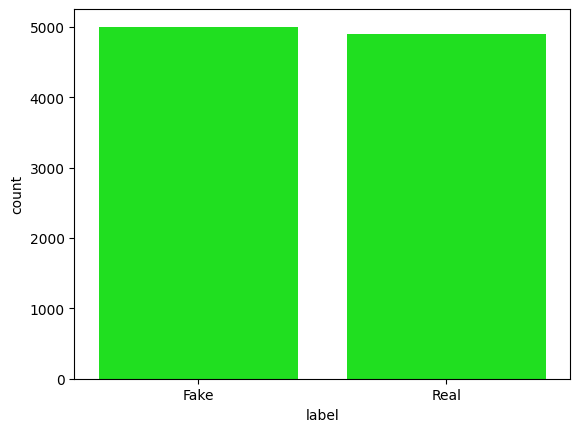

In [6]:
import seaborn as sns

sns.countplot(data = df, x= "label", color = 'lime')

In [9]:
#Add the new column "label_num" which gives a unique number to each of these labels 

target = {'Fake': 0, 'Real': 1}

df['label_num'] = df['label'].map({
    'Fake': 0,
    'Real': 1
})

#check the results with top 5 rows

df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


# Modelling without Pre-processing Text data


In [60]:
#import train-test-split from sklearn 

from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.label_num, test_size = 0.2, random_state=2022,stratify=df.label_num)

In [61]:
#print the shapes of X_train and X_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7920,)
(1980,)
(7920,)
(1980,)


<b>Attempt 1 :</b>

 1 using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
* print the classification report.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1000
           1       0.93      0.96      0.95       980

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [63]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1000
           1       0.81      0.98      0.88       980

    accuracy                           0.87      1980
   macro avg       0.89      0.88      0.87      1980
weighted avg       0.89      0.87      0.87      1980



In [64]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



<b>Attempt 2 :</b>

using the sklearn pipeline module create a classification pipeline to classify the Data.

<b>Note:</b>

* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
* print the classification report.

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='cosine'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1000
           1       0.86      0.99      0.92       980

    accuracy                           0.92      1980
   macro avg       0.92      0.92      0.92      1980
weighted avg       0.92      0.92      0.92      1980



In [66]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='cosine'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1000
           1       0.77      1.00      0.87       980

    accuracy                           0.85      1980
   macro avg       0.88      0.85      0.85      1980
weighted avg       0.88      0.85      0.85      1980



In [67]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('KNN_10_neighbors', KNeighborsClassifier(n_neighbors=10, metric='cosine'))   
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



<b> Attempt 3 : </b>

using the sklearn pipeline module create a classification pipeline to classify the Data.

<b>Note:</b>

* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



<b>Attempt 4 :</b>

using the sklearn pipeline module create a classification pipeline to classify the Data.

<b>Note:</b>

* using CountVectorizer with both unigram and bigrams.
* use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
* print the classification report.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,1))),
    ('MultinomialNB', MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1000
           1       0.97      0.97      0.97       980

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



In [69]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('MultinomialNB', MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [39]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [40]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data

df['preprocessed_txt'] = df['Text'].apply(preprocess)

# this will take some time, please be patient

In [41]:
#print the top 5 rows

df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


# Build a model with pre processed text

In [71]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too

X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_txt, df.label_num, test_size = 0.2, random_state = 2022, stratify=df.label_num)

#Note: Make sure to use only the "preprocessed_txt" column for splitting

Let's check the scores with our best model till now

<b> Random Forest </b>

<b>Attempt1 :</b>

using the sklearn pipeline module create a classification pipeline to classify the Data.
 
 <b>Note:</b>

* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [72]:
#1. create a pipeline object

clf = Pipeline([
    ('CountVector', CountVectorizer(ngram_range= (3,3))),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1000
           1       0.99      0.93      0.96       980

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



<b> Attempt2 : </b>

using the sklearn pipeline module create a classification pipeline to classify the Data.
    
<b> Note: </b>

* using CountVectorizer with unigram, Bigram, and trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [73]:
#1. create a pipeline object

clf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [74]:
#1. create a pipeline object

clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [75]:
#1. create a pipeline object

clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

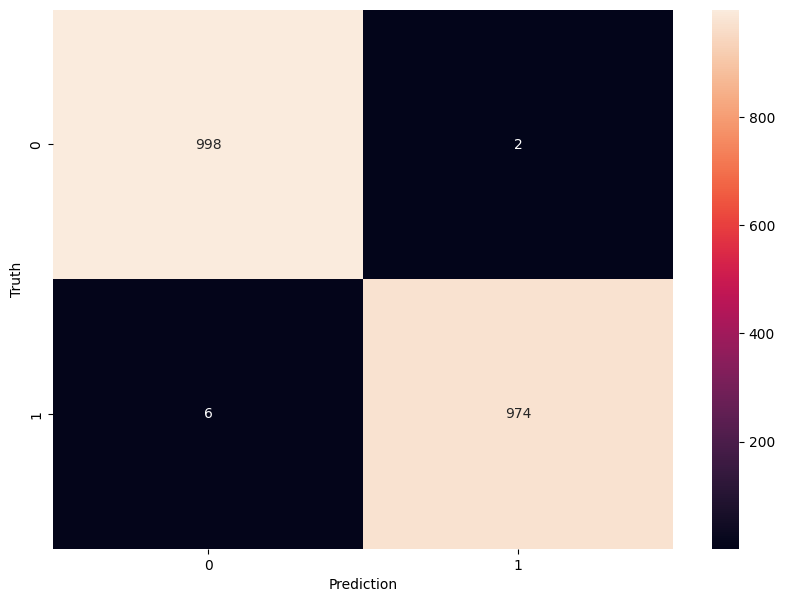

In [77]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Final Observations

* As machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training.

* In this process, we convert text into a very <b> high dimensional numeric vector </b> using the technique of Bag of words and we use sklearn CountVectorizer for this.

<b> Without Pre-Processing Data </b>

* From the above in most of the cases, we can see that when we have the count vectorizer above trigrams or at trigrams, the performance keeps degrading. The major possible reason for this as the <b>ngram_range</b> keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.

* For this reason, models like KNN failed terribly when performed with trigrams and using the <b>euclidean distance</b>. K-Nearest Neighbours(KNN) doesn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of the model. It performed well for class 1 and had terrible results for Class 0.

* Both recall and F1 scores increase better when trained with the same KNN model but with cosine distance as <b>cosine distance</b> does not get influenced by the number of dimensions as it uses the angle better the two text vectors to calculate the similarity.

* With respect to Naive and RandomForest models, both performed really well, and random forest with trigrams has a better edge on the recall metric.

* As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories.

* The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.


<b> With Pre-Processing Data </b>

* Have trained the best model RandomForest on the pre-processed data, but RandomForest with trigrams fails to produce the same results here.

* But the same randomForest with Unigram to Trigram features helps to produce very amazing results and is tops in the entire list with very good F1 scores and Recall scores.

<b> Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc. </b>